# Lesson 12 Assessment (Insight.inc)

## Import the Necessary Liabraries

In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

## Load and inspect the data set

In [4]:
cust_feedback_df = pd.read_csv(r'C:\Users\Itumeleng.Sekoma\Desktop\Test777777\.ipynb_checkpoints\customer_feedback.csv')
cust_feedback_df.head()

,Date,Customer_ID,Product,Rating,Feedback
0,2023-11-16,1414,Product B,2,"Great product, very satisfied!"
1,2023-07-14,1365,Product A,1,"Excellent quality, highly recommend!"
2,2023-09-22,1855,Product A,2,"Great product, very satisfied!"
3,2022-07-12,1738,Product D,5,"Not bad, but could be better."
4,2023-12-09,1419,Product E,1,"Worst product ever, very disappointed."


In [5]:
cust_feedback_df.tail()

,Date,Customer_ID,Product,Rating,Feedback
495,2023-12-04,1209,Product D,2,"Fantastic, exceeded my expectations!"
496,2023-06-01,1691,Product D,2,"Not bad, but could be better."
497,2023-05-13,1296,Product A,5,"Not bad, but could be better."
498,2023-05-14,1059,Product A,3,Not worth the price.
499,2022-07-25,1490,Product A,4,Terrible customer service.


In [6]:
cust_feedback_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         500 non-null    object
 1   Customer_ID  500 non-null    int64 
 2   Product      500 non-null    object
 3   Rating       500 non-null    int64 
 4   Feedback     500 non-null    object
dtypes: int64(2), object(3)
memory usage: 19.7+ KB


In [7]:
cust_feedback_df.describe()

,Customer_ID,Rating
count,500.000000,500.000000
mean,1497.226000,2.982000
std,281.025204,1.378941
min,1000.000000,1.000000
25%,1241.000000,2.000000
50%,1512.000000,3.000000
75%,1731.750000,4.000000
max,1999.000000,5.000000


In [8]:
print('This DataFrame consists of ',cust_feedback_df.shape[0], 'Observations and ',cust_feedback_df.shape[1], 'Fields')

This DataFrame consists of  500 Observations and  5 Fields


In [9]:
cust_feedback_df.isnull().sum()

Date           0
Customer_ID    0
Product        0
Rating         0
Feedback       0
dtype: int64

#### Change Date from object to Date Data type

In [10]:
cust_feedback_df['Date'] = pd.to_datetime(cust_feedback_df['Date'])
cust_feedback_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         500 non-null    datetime64[ns]
 1   Customer_ID  500 non-null    int64         
 2   Product      500 non-null    object        
 3   Rating       500 non-null    int64         
 4   Feedback     500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 19.7+ KB


### Visualize Overall Ratings ditrubutions

In [11]:
rating_cnt = cust_feedback_df['Rating'].value_counts()

In [12]:
cust_feedback_df.head(15)

,Date,Customer_ID,Product,Rating,Feedback
0,2023-11-16,1414,Product B,2,"Great product, very satisfied!"
1,2023-07-14,1365,Product A,1,"Excellent quality, highly recommend!"
2,2023-09-22,1855,Product A,2,"Great product, very satisfied!"
3,2022-07-12,1738,Product D,5,"Not bad, but could be better."
4,2023-12-09,1419,Product E,1,"Worst product ever, very disappointed."
5,2022-12-26,1585,Product B,3,"Worst product ever, very disappointed."
6,2022-01-10,1218,Product A,4,"Excellent quality, highly recommend!"
7,2023-12-25,1951,Product A,2,"Average, nothing special."
8,2022-10-05,1538,Product C,5,Good value for money.
9,2023-08-23,1374,Product B,1,Not worth the price.


In [13]:
print(rating_cnt)

Rating
4    109
2    108
3    100
1     94
5     89
Name: count, dtype: int64


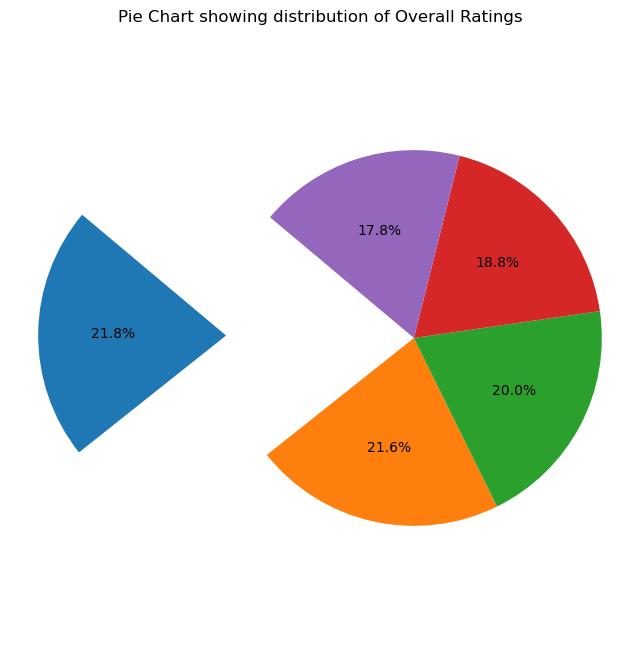

In [14]:
plt.figure(figsize=(8,8))
plt.pie(rating_cnt, explode=(1,0,0,0,0) ,autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart showing distribution of Overall Ratings')
plt.axis('equal')
plt.show()

### Visualise the Average Product rating in a Bar and Column chart

In [15]:
ave_prod_rating = cust_feedback_df.groupby('Product')['Rating'].mean().round(2).sort_values(ascending=False)
print(ave_prod_rating)

Product
Product C    3.08
Product A    3.02
Product B    2.95
Product D    2.94
Product E    2.92
Name: Rating, dtype: float64


In [16]:
colors=['g', 'b', 'r', 'y', 'k']

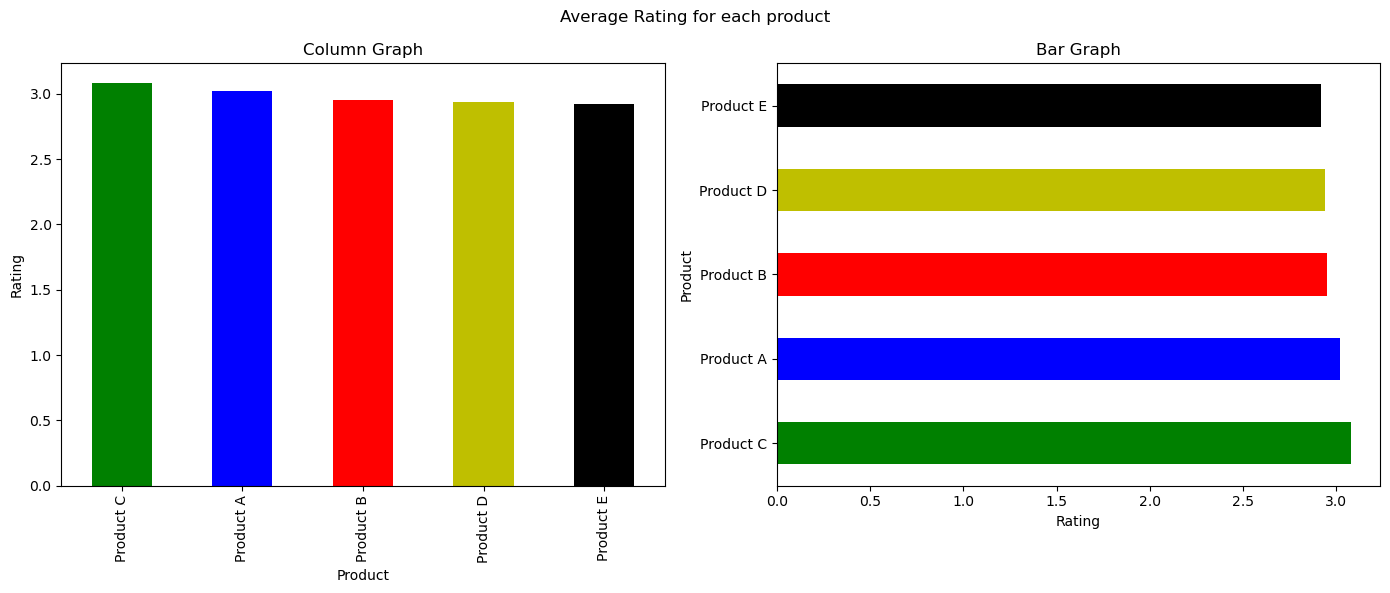

In [17]:
plt.figure(figsize=(14,6))
plt.suptitle('Average Rating for each product')

plt.subplot(1,2,1)
ave_prod_rating.plot(kind='bar',color=colors)
plt.title('Column Graph')
plt.xlabel('Product')
plt.ylabel('Rating')

plt.subplot(1,2,2)
ave_prod_rating.plot(kind='barh',color=colors)
plt.title('Bar Graph')
plt.xlabel('Rating')
plt.ylabel('Product')

plt.tight_layout()
plt.show()

In [18]:
from textblob import TextBlob
from wordcloud import WordCloud

# Perform sentiment analysis
cust_feedback_df['Sentiment'] = cust_feedback_df['Feedback'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Separate positive and negative comments
positive_comments = ' '.join(cust_feedback_df[cust_feedback_df['Sentiment'] > 0]['Feedback'])
negative_comments = ' '.join(cust_feedback_df[cust_feedback_df['Sentiment'] < 0]['Feedback'])

# Generate word clouds
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_comments)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_comments)

# Plot the word clouds
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Comments')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Comments')

plt.show()


ModuleNotFoundError: No module named 'textblob'